## 1. Classification

### Supervised Learning

- Predictor variables/features and a target variable
- Aim: Predict the target variable, given the predictor variables
    - Classification: target variable consist of categories
    - Regression: target variable is continuos

---
**Naming conventions:**
- Features = predictor variables = independent variables (variable yang mempengaruhi dependen variable)
- Target variable = dependent variable = response variable

---
**Supervised learning:**
- Automate time-consuming or expensive manual tasks
    - Doctor diagnosis
- Make predictions about the future
    - Will customer click on ad or not?
- Need labeled data
    - Historical data with label
    - Experiments to get labeled data
    - Crowd-sourcing labeled data

#### Iris dataset

**Iris dataset:** 
- Features: Petal length, petal width, sepal length, sepal width
- Target variable: spesies -> versicolor, virginica, setosa

In [2]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')
iris = datasets.load_iris() #load data dari scikit-learn
type(iris)

sklearn.utils.Bunch

In [3]:
print(iris.keys()) #cek isi datanya apa aja

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [4]:
type(iris.data), type(iris.target)

(numpy.ndarray, numpy.ndarray)

In [5]:
iris.data.shape #baris, kolom -> baris(data), kolom(features)

(150, 4)

In [6]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

### Exploratory data analysis (EDA)

In [8]:
X = iris.data
y = iris.target
df = pd.DataFrame(X, columns=iris.feature_names)
print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


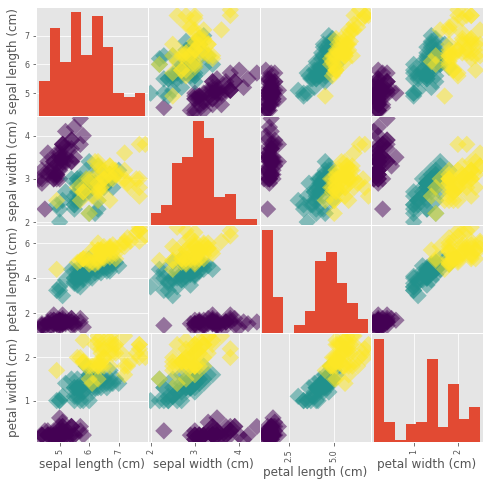

In [9]:
_ = pd.plotting.scatter_matrix(df, c = y, figsize=[8,8], s=150, marker='D')

In [19]:
votes = pd.read_csv("house-votes-84.csv")
df = pd.DataFrame(votes)
df.head()

,republican,n,y,n.1,y.1,y.2,y.3,n.2,n.3,n.4,y.4,?,y.5,y.6,y.7,n.5,y.8
0,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
1,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
2,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
3,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y
4,democrat,n,y,y,n,y,y,n,n,n,n,n,n,y,y,y,y


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 434 entries, 0 to 433
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   republican  434 non-null    object
 1   n           434 non-null    object
 2   y           434 non-null    object
 3   n.1         434 non-null    object
 4   y.1         434 non-null    object
 5   y.2         434 non-null    object
 6   y.3         434 non-null    object
 7   n.2         434 non-null    object
 8   n.3         434 non-null    object
 9   n.4         434 non-null    object
 10  y.4         434 non-null    object
 11  ?           434 non-null    object
 12  y.5         434 non-null    object
 13  y.6         434 non-null    object
 14  y.7         434 non-null    object
 15  n.5         434 non-null    object
 16  y.8         434 non-null    object
dtypes: object(17)
memory usage: 57.8+ KB


In [21]:
df.describe()

,republican,n,y,n.1,y.1,y.2,y.3,n.2,n.3,n.4,y.4,?,y.5,y.6,y.7,n.5,y.8
count,434,434,434,434,434,434,434,434,434,434,434,434,434,434,434,434,434
unique,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
top,democrat,n,y,y,n,y,y,y,y,y,y,n,n,y,y,n,y
freq,267,235,194,253,247,211,271,239,242,207,215,264,233,208,247,232,268


In [ ]:
import seaborn as sns

plt.figure()
sns.countplot(x='education', hue='party', data=df, palette='RdBu')
plt.xticks([0,1], ['No', 'Yes'])
plt.show()

### Classification challenge

#### K-Nearest Neighbors

**Basic idea: Predict the label of a data point**
- Looking at the 'k' closest labeled data points
- Taking a majority vote

**Scikit-learn fit and predict:**
- All machine learning models implemented as Python classes
    - Implement algorithm for learning and predicting
    - Store the information learned from the data
- Training a model on the data = 'fitting' a model to the data
    - .fit() method
- To predict the labels of new data: .predict() method

In [11]:
# Using scikit-learn to fit a classifier (Training data)

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(iris['data'], iris['target']) #training and labeled data

KNeighborsClassifier(n_neighbors=6)

In [12]:
iris['data'].shape

(150, 4)

In [13]:
iris['target'].shape

(150,)

In [14]:
# Predicting on unlabeled data (Test data)
X_new = np.array([[5.6, 2.8, 3.9, 1.1], [5.7, 2.6, 3.8, 1.3], [4.7, 3.2, 1.3, 0.2]])

prediction = knn.predict(X_new)
X_new.shape

(3, 4)

In [15]:
print('Prediction: {}'.format(prediction))

Prediction: [1 1 0]


In [ ]:
# Import KNeighborsClassifier from sklearn.neighbors
from sklearn.neighbors import KNeighborsClassifier

# Create arrays for the features and the response variable
y = df['party'].values #target
X = df.drop('party', axis=1).values #data/features

# Create a k-NN classifier with 6 neighbors
knn = KNeighborsClassifier(n_neighbors=6)

# Fit the classifier to the data
knn.fit(X, y)


In [ ]:
# Import KNeighborsClassifier from sklearn.neighbors
from sklearn.neighbors import KNeighborsClassifier 

# Create arrays for the features and the response variable
y = df['party'].values
X = df.drop('party', axis=1).values

# Create a k-NN classifier with 6 neighbors: knn
knn = KNeighborsClassifier(n_neighbors=6)

# Fit the classifier to the data
knn.fit(X, y)

# Predict the labels for the training data X
y_pred = knn.predict(X)

# Predict and print the label for the new data point X_new
new_prediction = knn.predict(X_new)
print("Prediction: {}".format(new_prediction))


### Measuring model performance

- In classification, accuracy is a commonly used metric
- Accuracy = Fraction of correct predictions
- Could compute accuracy on data used to fit classifier
- NOT indicative of ability to generalize
- Split data into training and test data
- Fit/train the classifier on the training set
- Make predictions on test set
- Compare predictions with the known labels

In [12]:
# Train/test split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21, stratify=y)
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("Test set predictions: {}".format(y_pred))

Test set predictions: [2 1 2 2 1 0 1 0 0 1 0 2 0 2 2 0 0 0 1 0 2 2 2 0 1 1 1 0 0 1 2 2 0 0 1 2 2
 1 1 2 1 1 0 2 1]


In [13]:
knn.score(X_test, y_test)

0.9555555555555556

Model complexity: 

    - Larger k = smoother decision boundary = less complex model (lebih bagus batasannya)
    - Smaller k = more complex model = can lead to overfitting

In [58]:
from sklearn import datasets
import matplotlib.pyplot as plt

digits = datasets.load_digits()
print(digits.keys())
print(digits['DESCR'])

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])
.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are di

In [60]:
print(digits.images.shape)
print(digits.data.shape)

(1797, 8, 8)
(1797, 64)


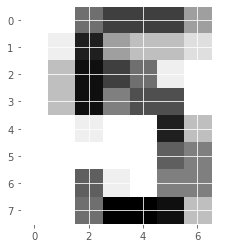

In [61]:
# Display digit 1010
plt.imshow(digits.images[1010], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

In [62]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

X = digits.data
y = digits.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)
print(knn.score(X_test, y_test))

0.9833333333333333


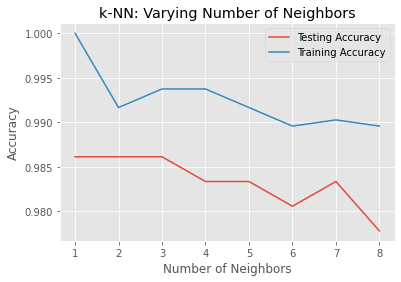

In [63]:
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors = k)

    # Fit the classifier to the training data
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()


Akurasi testing data yang baik ada di neighbors 3 dan 5

## 2. Regression

### Introduction to regression

#### Boston Data

- Target value -> continuous (country GDp, the price of a house)

In [17]:
#Boston housing data
import pandas as pd

boston = pd.read_csv('boston.csv')
print(boston.head())
# print(boston.describe())
# print(boston.info())

      CRIM    ZN  INDUS  CHAS     NX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  


In [18]:
# Create feature and target arrays

X = boston.drop('MEDV', axis=1).values #feature
y = boston['MEDV'].values #target

In [19]:
# Predicting house value from a single feature (6th feature)
X_rooms = X[:,5]
type(X_rooms), type(y)

(numpy.ndarray, numpy.ndarray)

In [20]:
y = y.reshape(-1, 1)
X_rooms = X_rooms.reshape(-1, 1)

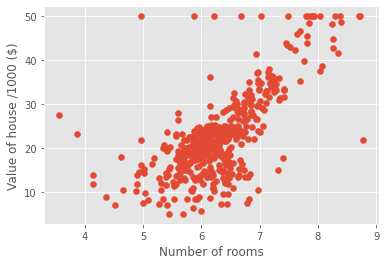

In [21]:
# Plotting house value vs. number of rooms
plt.scatter(X_rooms, y)
plt.ylabel('Value of house /1000 ($)')
plt.xlabel('Number of rooms')
plt.show()

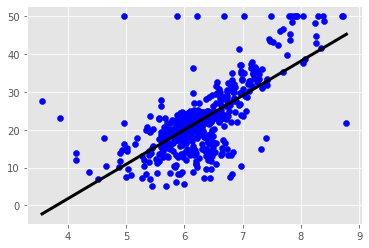

In [26]:
# Fitting a regression model

import numpy as np
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_rooms, y)
prediction_space = np.linspace(min(X_rooms), max(X_rooms)).reshape(-1, 1)
plt.scatter(X_rooms, y, color='blue')
plt.plot(prediction_space, reg.predict(prediction_space), color='black', linewidth=3)
plt.show()

#### Gapminder Data

In [30]:
import numpy as np
import pandas as pd

# Read CSV file
df = pd.read_csv('gm_2008_region.csv')
# df.head()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region
0,34811059.0,2.73,0.1,3.328945,24.59620,12314.0,129.9049,75.3,29.5,Middle East & North Africa
1,19842251.0,6.43,2.0,1.474353,22.25083,7103.0,130.1247,58.3,192.0,Sub-Saharan Africa
2,40381860.0,2.24,0.5,4.785170,27.50170,14646.0,118.8915,75.5,15.4,America
3,2975029.0,1.40,0.1,1.804106,25.35542,7383.0,132.8108,72.5,20.0,Europe & Central Asia
4,21370348.0,1.96,0.1,18.016313,27.56373,41312.0,117.3755,81.5,5.2,East Asia & Pacific


In [31]:
# Create arrays for features and target variable

X = df['fertility'].values
y = df['life'].values

In [32]:
# Print the dimensions of y and X before reshaping
print("Dimension of y before reshapping: ", y.shape)
print("Dimension of X before reshapping: ", X.shape)

Dimension of y before reshapping:  (139,)
Dimension of X before reshapping:  (139,)


In [34]:
# Resahpe X and y
y_reshaped = y.reshape(-1, 1)
X_reshaped = X.reshape(-1, 1)

In [36]:
# Print the dimensions of y and X after reshaping
print("Dimension of y after reshapping: ", y_reshaped.shape)
print("Dimension of X after reshapping: ", X_reshaped.shape)

Dimension of y after reshapping:  (139, 1)
Dimension of X after reshapping:  (139, 1)


<AxesSubplot:>

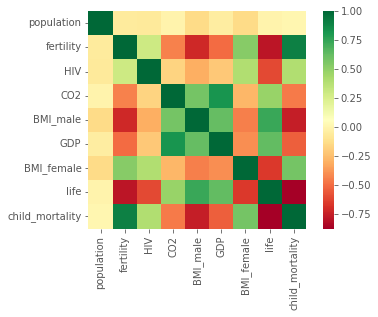

In [37]:
import seaborn as sns

sns.heatmap(df.corr(), square=True, cmap='RdYlGn')

Sel berwarna hijau menunjukkan positive correlation, sedangkan warna merah menunjukkan negative correlation

In [38]:
df.head()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region
0,34811059.0,2.73,0.1,3.328945,24.59620,12314.0,129.9049,75.3,29.5,Middle East & North Africa
1,19842251.0,6.43,2.0,1.474353,22.25083,7103.0,130.1247,58.3,192.0,Sub-Saharan Africa
2,40381860.0,2.24,0.5,4.785170,27.50170,14646.0,118.8915,75.5,15.4,America
3,2975029.0,1.40,0.1,1.804106,25.35542,7383.0,132.8108,72.5,20.0,Europe & Central Asia
4,21370348.0,1.96,0.1,18.016313,27.56373,41312.0,117.3755,81.5,5.2,East Asia & Pacific


In [39]:
df.describe()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality
count,1.390000e+02,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000
mean,3.549977e+07,3.005108,1.915612,4.459874,24.623054,16638.784173,126.701914,69.602878,45.097122
std,1.095121e+08,1.615354,4.408974,6.268349,2.209368,19207.299083,4.471997,9.122189,45.724667
min,2.773150e+05,1.280000,0.060000,0.008618,20.397420,588.000000,117.375500,45.200000,2.700000
25%,3.752776e+06,1.810000,0.100000,0.496190,22.448135,2899.000000,123.232200,62.200000,8.100000
50%,9.705130e+06,2.410000,0.400000,2.223796,25.156990,9938.000000,126.519600,72.000000,24.000000
75%,2.791973e+07,4.095000,1.300000,6.589156,26.497575,23278.500000,130.275900,76.850000,74.200000
max,1.197070e+09,7.590000,25.900000,48.702062,28.456980,126076.000000,135.492000,82.600000,192.000000


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   population       139 non-null    float64
 1   fertility        139 non-null    float64
 2   HIV              139 non-null    float64
 3   CO2              139 non-null    float64
 4   BMI_male         139 non-null    float64
 5   GDP              139 non-null    float64
 6   BMI_female       139 non-null    float64
 7   life             139 non-null    float64
 8   child_mortality  139 non-null    float64
 9   Region           139 non-null    object 
dtypes: float64(9), object(1)
memory usage: 11.0+ KB


### Basics linear regression

Regression mechanics: 
- y = ax + b -> 1 feature

    - y = target
    - x = single feature
    - a, b = parameters of model

- Gimana caranya kita memilih a dan b nya?
- Define an error functions for any given line
    - Choose the line that minimizes the error function (loss or cost)

- y = a1x1 + a2x2 + b -> 2 feature
- to fit a linear regression model here:    
    - Need to specify 3 variables

In [42]:
boston = pd.read_csv('boston.csv')

# Create feature and target arrays

X = boston.drop('MEDV', axis=1).values #feature
y = boston['MEDV'].values #target

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
reg_all = LinearRegression()
reg_all.fit(X_train, y_train)
y_pred = reg_all.predict(X_test)
reg_all.score(X_test, y_test)

0.7112260057484915

In [48]:
from sklearn.linear_model import LinearRegression

df = pd.read_csv('gm_2008_region.csv')
X_fertility = df['fertility'].values
y = df['life'].values

# Create the regressor
reg = LinearRegression()

# Create prediction space
prediction_space = np.linspace(min(X_fertility), max(X_fertility)).reshape(-1,1)

# Fit the model to the data
reg.fit(X_fertility, y)

# Predict
y_pred = reg.predict(prediction_space)

# Print R^2
print(reg.score(X_fertility, y))

Default scoring method ffor linear regression is R squared

#### Train/test split for regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

df = pd.read_csv('gm_2008_region.csv')
X = df.drop('life').values
y = df['life'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

reg_all = LinearRegression()
reg_all.fit(X_train, y_train)
y_pred = reg_all.predict(X_test)

# Compute and print R^2 and RMSE
print("R^2: {}".format(reg_all.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))

### Cross-validation

- Model performance is dependent on way the data is split
- Not representative of the model's ability to generalize
- Solution : Cross validation

- Prosedure: 
    - Bagi dataset menjadi 5 group atau lebih
    - Kita pake fold1 jadi training set dan 4 lainnya jadi test set -> metric 1
    - Kita pake fold2 jadi training set dan 4 lainnya jaid test set -> metric 2
    - Begitu seterusnya
    - Hasil akhir kita punya 5 nilai r^2 yang bisa dijabarkan statistiknya (mean, median)
    - 5 folds = 5-fold cross-validation
    - 6 fold = 6-fold cross-validation
    - k fold = k-fold cross-validation
    - More folds = more computationally expensive

#### 5-fold cv

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
cv_results = cross_val_score(reg, X, y, cv=5)
print(cv_results)

In [ ]:
# Import the necessary modules
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# Create a linear regression object: reg
reg = LinearRegression()

# Compute 5-fold cross-validation scores: cv_scores
cv_scores = cross_val_score(reg, X, y, cv=5)

# Print the 5-fold cross-validation scores
print(cv_scores)

print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores)))


#### K-Fold CV comparison

In [ ]:
# Import necessary modules
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# Create a linear regression object: reg
reg = LinearRegression()

# Perform 3-fold CV
cvscores_3 = cross_val_score(reg, X, y, cv=3)
print(np.mean(cvscores_3))

# Perform 10-fold CV
cvscores_10 = cross_val_score(reg, X, y, cv=10)
print(np.mean(cvscores_10))


### Regularized regression

Kenapa di-regularize?

    - Recall: Linear regression minimizes a loss function
    - It chooses a coefficient for each feature variable
    - Large coefficients can lead to overfitting
    - Penalizing large coefficients: Regularization

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)
ridge.score(X_test, y_test)

In [ ]:
from sklearn.linear_model import Lasso

names = boston.drop('MEDV', axis=1).columns
lasso = Lasso(alpha=0.1)
lasso_coef = lasso.fit(X, y).coef_

In [ ]:
# Import Lasso
from sklearn.linear_model import Lasso

# Instantiate a lasso regressor: lasso
lasso = Lasso(alpha=0.4, normalize=True)

# Fit the regressor to the data
lasso.fit(X, y)

# Compute and print the coefficients
lasso_coef = lasso.coef_
print(lasso_coef)

# Plot the coefficients
plt.plot(range(len(df_columns)), lasso_coef)
plt.xticks(range(len(df_columns)), df_columns.values, rotation=60)
plt.margins(0.02)
plt.show()


In [ ]:
# Import necessary modules
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

# Setup the array of alphas and lists to store scores
alpha_space = np.logspace(-4, 0, 50)
ridge_scores = []
ridge_scores_std = []

# Create a ridge regressor: ridge
ridge = Ridge(normalize=True)

# Compute scores over range of alphas
for alpha in alpha_space:

    # Specify the alpha value to use: ridge.alpha
    ridge.alpha = alpha
    
    # Perform 10-fold CV: ridge_cv_scores
    ridge_cv_scores = cross_val_score(ridge, X, y, cv=10)
    
    # Append the mean of ridge_cv_scores to ridge_scores
    ridge_scores.append(np.mean(ridge_cv_scores))
    
    # Append the std of ridge_cv_scores to ridge_scores_std
    ridge_scores_std.append(np.std(ridge_cv_scores))

# Display the plot
display_plot(ridge_scores, ridge_scores_std)


## 3. Fine-tuning model

### Metrics for classification

- Seberapa bagus model kamu?

**Classification metrics:**
- Measuring model performance with accuracy
    - Fraction of correctly classified samples
    - Not always accuracy metrics

**Class imbalance example: Emails**
- Spam classification
     - 99% of emails are real, 1% of emails are spam
- Could build a classifier that predicts ALL emails as real
    - 99% accurate!
    - but horrib;e at actually classifying spam
    - Fails at its original purpose
- need more nuance metrics

**Diagnosing classification predictions:**
- Confusion matrix
- Accuracy : tp + tn / tp + tn + fp + fn
- Precision : tp / tp+fp
- Recall: tp / tp+fn
- F1 score: 2 * precision * recall / precision + recall
- High precision: not many real emails predicted as spam
- High recall: predicted most spam emails correctly

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

knn = KNeighborsClassifier(n_neighbors=8)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [14]:
df = pd.read_csv('diabetes.csv')

X = df.drop('diabetes', axis=1).values #features
y = df['diabetes'].values #target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[176  30]
 [ 56  46]]
              precision    recall  f1-score   support

           0       0.76      0.85      0.80       206
           1       0.61      0.45      0.52       102

    accuracy                           0.72       308
   macro avg       0.68      0.65      0.66       308
weighted avg       0.71      0.72      0.71       308



### Logistic regression and the ROC curve

- klasifikasi biner, yaitu memiliki dua kemungkinan label untuk variabe target.

**Logistic regression for binary classification:**
- Logistic regression outputs probabilities
- kalo probability 'p' lebih besar dari 0.5:
    - data labeled '1'
- kalo probability 'p' kurang dari 0.5: 
    - data labeled '0'
- default logistic regression threshold = 0.5

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
logreg = LogisticRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
logreg.fit(X_train, y_train)
y_pred = logref.predict(X_test)

#### Plotting the ROC curve

In [ ]:
from sklearn.metrics import roc_curve
y_pred_prob = logreg.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

## 4. Preprocessing and pipelines